![](https://github.com/sfbrigade/CA_DOJ_OpenJustice/blob/master/figure/ca_openjustice.png?raw=true)

## Prompt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import wget

import numpy as np

import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,classification_report
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from sklearn.learning_curve import learning_curve
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV

%matplotlib inline

In [38]:
crime_df = pd.read_csv("all_features_so_far.csv")

In [39]:
poverty_df = pd.read_csv("poverty_rate.csv")
poverty_df.head(10)

Year   Total Number  Standard_Error  Percent  Standard_Error_Percent  \
0  1980  23,748  2,619             144     11.0                    0.60   
1  1981  24,112  3,216             159     13.3                    0.60   
2  1982  24,613  3,475             165     14.1                    0.60   
3  1983  25,169  3,755             194     14.9                    0.71   
4  1984  25,596  3,375             163     13.2                    0.60   
5  1985  26,456  3,596             188     13.6                    0.70   
6  1986  27,082  3,453             184     12.7                    0.70   
7  1987  27,877  3,443             188     12.3                    0.70   
8  1988  27,855  3,687             249     13.2                    0.90   
9  1989  29,346  3,772             197     12.9                    0.70   

   Poverty_Rate  
0     11.028297  
1     13.337757  
2     14.118555  
3     14.919147  
4     13.185654  
5     13.592380  
6     12.750166  
7     12.350683  
8     13.236403  
9     12.853541

In [40]:
pov_unemp_df = crime_df.merge(poverty_df,on='Year',how='left')
pov_unemp_df.dropna(inplace=True)
pov_unemp_df.head(10)

Year  Violent Crime rate  Avg unemployment   Total Number  Standard_Error  \
4   1980               893.6          6.875000  23,748  2,619           144.0   
5   1981               863.0          7.416667  24,112  3,216           159.0   
6   1982               814.7          9.975000  24,613  3,475           165.0   
7   1983               772.6          9.783333  25,169  3,755           194.0   
8   1984               763.4          7.750000  25,596  3,375           163.0   
9   1985               765.3          7.150000  26,456  3,596           188.0   
10  1986               920.5          6.733333  27,082  3,453           184.0   
11  1987               918.0          5.783333  27,877  3,443           188.0   
12  1988               929.8          5.275000  27,855  3,687           249.0   
13  1989               977.7          5.116667  29,346  3,772           197.0   

    Percent  Standard_Error_Percent  Poverty_Rate  
4      11.0                    0.60     11.028297  
5      13.3                    0.60     13.337757  
6      14.1                    0.60     14.118555  
7      14.9                    0.71     14.919147  
8      13.2                    0.60     13.185654  
9      13.6                    0.70     13.592380  
10     12.7                    0.70     12.750166  
11     12.3                    0.70     12.350683  
12     13.2                    0.90     13.236403  
13     12.9                    0.70     12.853541

In [42]:
pov_unemp_df.info()
# pov_unemp_df.types
# pov_unemp_df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 4 to 36
Data columns (total 9 columns):
Year                      33 non-null int64
Violent Crime rate        33 non-null float64
Avg unemployment          33 non-null float64
Total                     33 non-null object
Number                    33 non-null object
Standard_Error            33 non-null float64
Percent                   33 non-null float64
Standard_Error_Percent    33 non-null float64
Poverty_Rate              33 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.6+ KB


## Exploratory Data Analysis

In [54]:
pov_unemp_df.head(10)

pov_unemp_df.rename(inplace=True, index=str, columns={'Violent Crime rate': 'Violent_Crime_Rate',
                                        'Avg unemployment': 'Avg_Unemployment'})

In [55]:
pov_unemp_df.head(10)

Year  Violent_Crime_Rate  Avg_Unemployment   Total Number  Standard_Error  \
4   1980               893.6          6.875000  23,748  2,619           144.0   
5   1981               863.0          7.416667  24,112  3,216           159.0   
6   1982               814.7          9.975000  24,613  3,475           165.0   
7   1983               772.6          9.783333  25,169  3,755           194.0   
8   1984               763.4          7.750000  25,596  3,375           163.0   
9   1985               765.3          7.150000  26,456  3,596           188.0   
10  1986               920.5          6.733333  27,082  3,453           184.0   
11  1987               918.0          5.783333  27,877  3,443           188.0   
12  1988               929.8          5.275000  27,855  3,687           249.0   
13  1989               977.7          5.116667  29,346  3,772           197.0   

    Percent  Standard_Error_Percent  Poverty_Rate  
4      11.0                    0.60     11.028297  
5      13.3                    0.60     13.337757  
6      14.1                    0.60     14.118555  
7      14.9                    0.71     14.919147  
8      13.2                    0.60     13.185654  
9      13.6                    0.70     13.592380  
10     12.7                    0.70     12.750166  
11     12.3                    0.70     12.350683  
12     13.2                    0.90     13.236403  
13     12.9                    0.70     12.853541

## Pair Plot Code

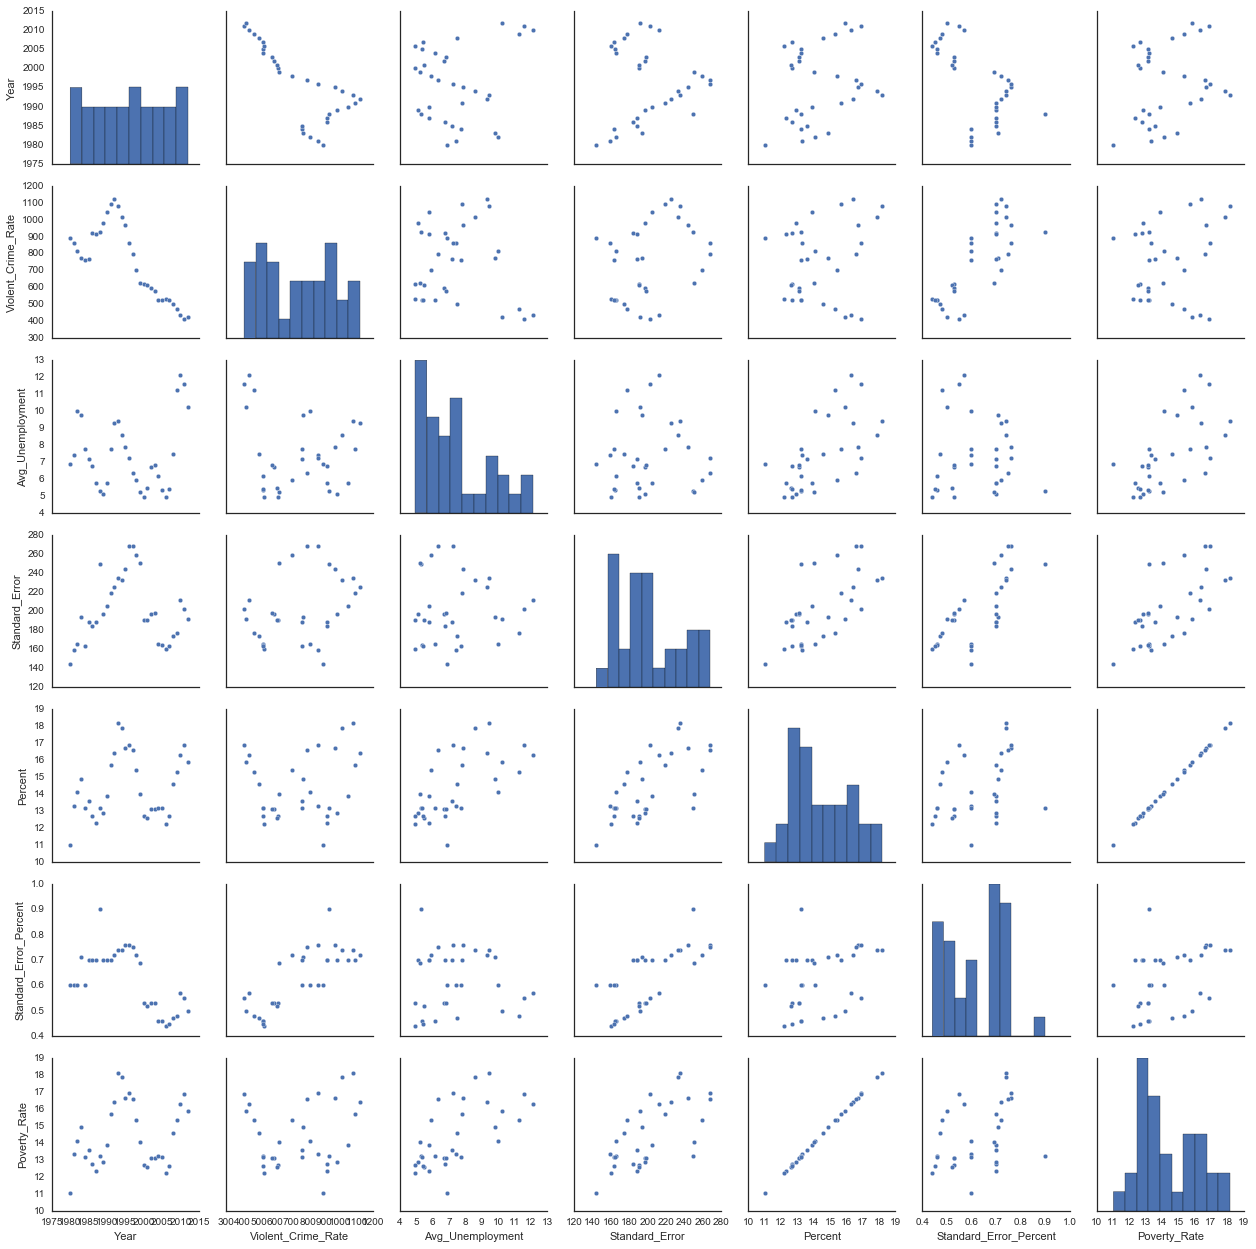

In [56]:
# Maybe not the best idea...
sns.pairplot(pov_unemp_df)
plt.show()

## Linear Regression Code

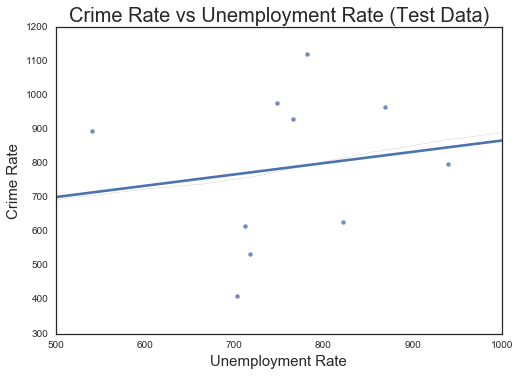

Intercept_ :  136.774697092
('Avg_Unemployment', -48.847666582995963)
('Poverty_Rate', 67.029763488782095)
lm.rsquared :  -0.090158108066




In [127]:
target = pov_unemp_df['Violent_Crime_Rate']
features = ['Avg_Unemployment','Poverty_Rate']

X_train, X_test, y_train, y_test = train_test_split(pov_unemp_df[features], target, test_size=0.30,random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

# Regression Plot
sns.set(style="white")
sns.regplot(y_pred,y_test,ci=0)
plt.title("Crime Rate vs Unemployment Rate (Test Data)", fontsize="20")
plt.xlabel("Unemployment Rate",fontsize="15")
plt.ylabel("Crime Rate",fontsize="15")
plt.show()

zip_features = zip(features, lm.coef_)

print ("Intercept_ : ", lm.intercept_)
for feature in zip_features:
    print(feature)
# print ("Coef_ : ", lm.coef_)
print ("lm.rsquared : ", lm.score(X_test,y_test))
print("\n")

In [125]:
# part_one = ((y_test - y_pred) ** 2).sum()
# part_two = ((y_test - y_test.mean()) ** 2).sum()

# (1 -part_one/part_two)

-0.0901581080659557